<a href="https://colab.research.google.com/github/Yash19815/svm/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/iris")

df= pd.read_csv('/kaggle/input/iris/Iris.csv')
df.head()



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [16]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


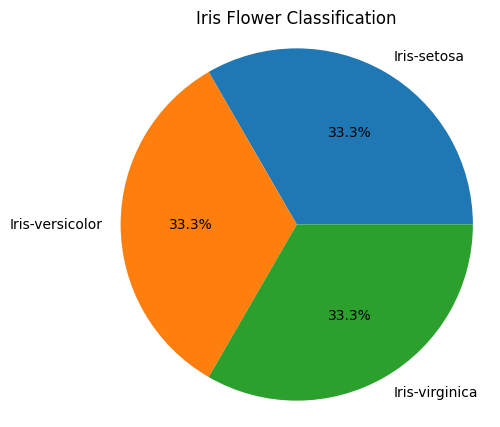

In [17]:
species_counts = df['Species'].value_counts()
plt.figure(figsize=(5, 5))
plt.title('Iris Flower Classification')
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=0)
plt.axis('equal')
plt.show()

In [18]:
def barplot(a,b,c):
  plt.figure(figsize=(10, 6))
  sns.barplot(data=df, x=a, y=b)
  plt.title(c)
  return plt.show()

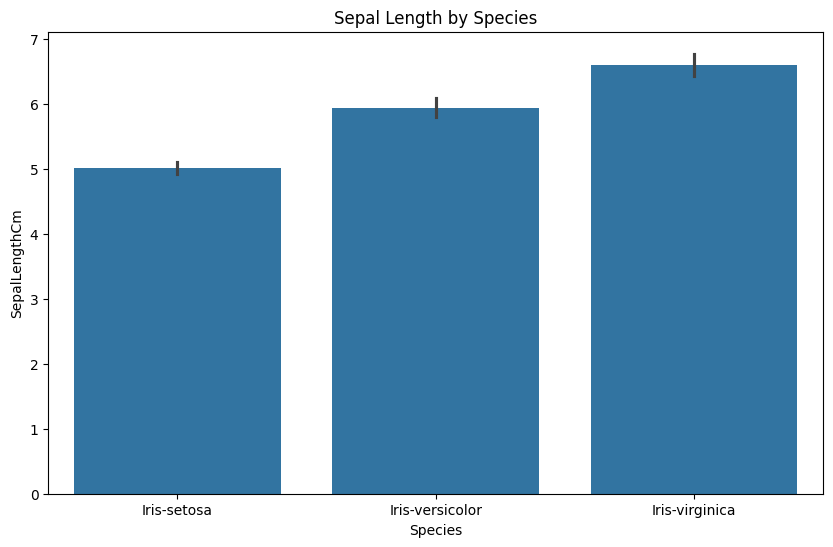

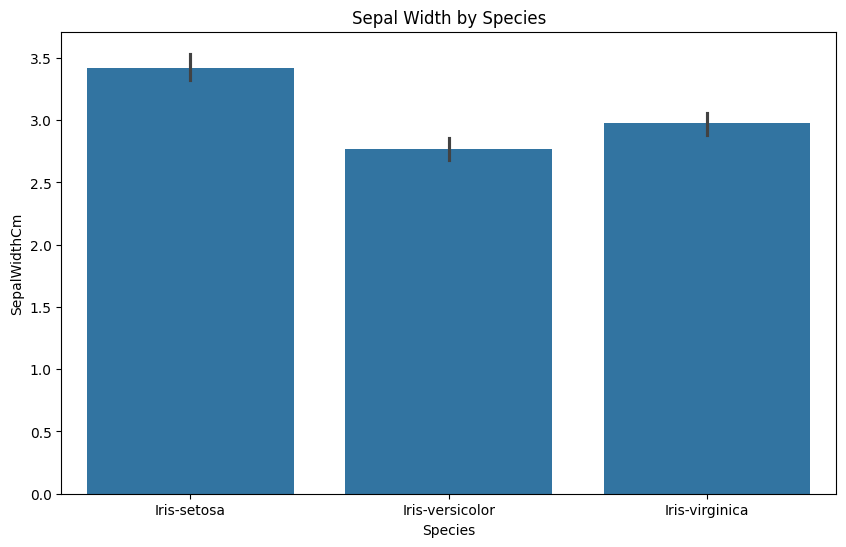

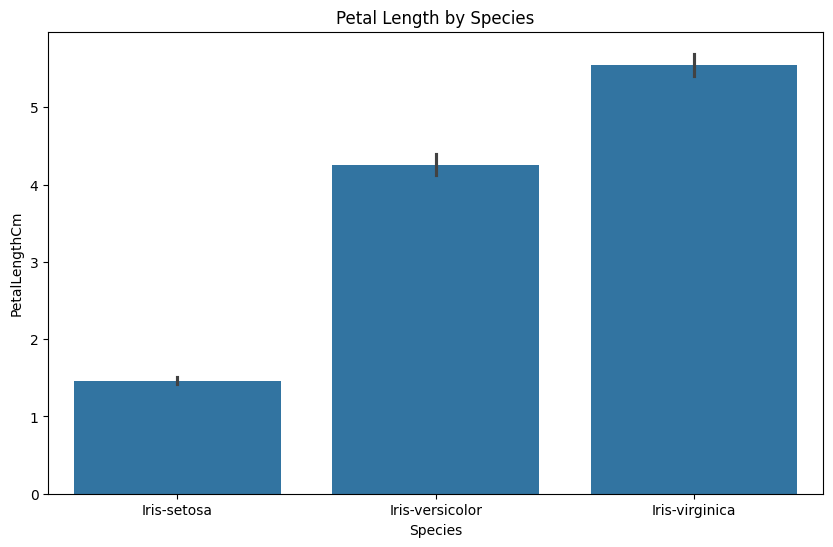

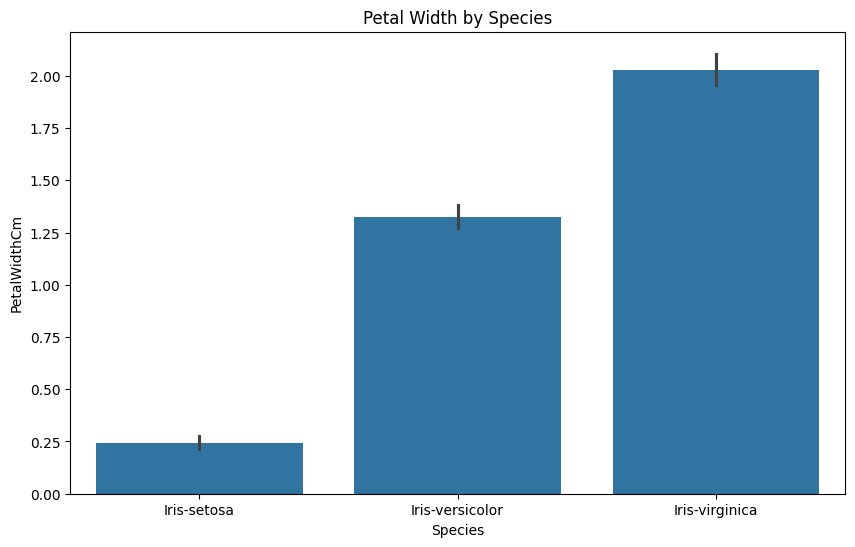

In [19]:
barplot(df['Species'], df['SepalLengthCm'], 'Sepal Length by Species' )
barplot(df['Species'], df['SepalWidthCm'], 'Sepal Width by Species' )
barplot(df['Species'], df['PetalLengthCm'], 'Petal Length by Species' )
barplot(df['Species'], df['PetalWidthCm'], 'Petal Width by Species' )

In [24]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]


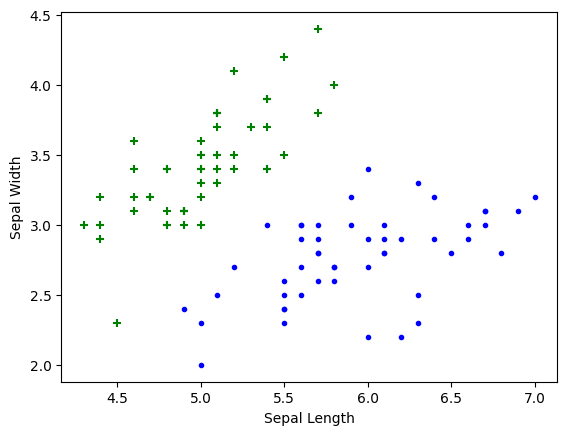

In [26]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['SepalLengthCm'], df0['SepalWidthCm'],color="green",marker='+')
plt.scatter(df1['SepalLengthCm'], df1['SepalWidthCm'],color="blue",marker='.')

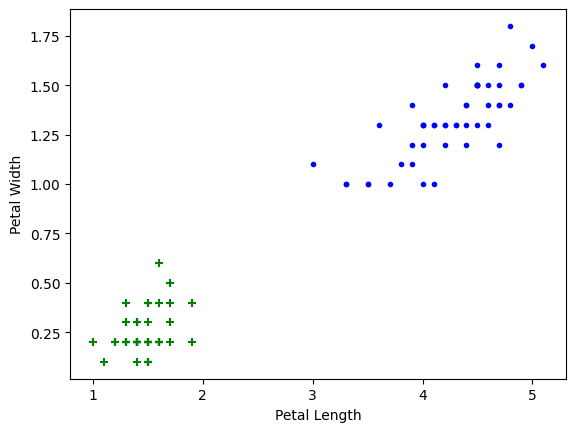

In [27]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['PetalLengthCm'], df0['PetalWidthCm'],color="green",marker='+')
plt.scatter(df1['PetalLengthCm'], df1['PetalWidthCm'],color="blue",marker='.')

In [43]:
from sklearn.model_selection import train_test_split
X = df.drop('Species', axis=1)
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7,random_state=420)


In [38]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

In [32]:

model.score(X_test, y_test)

1.0

In [34]:

model.predict([[4.8,3.0,1.5,0.3,0.4]])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)

In [48]:
for i in range (1,5):
  model = SVC(C=i, gamma = 10, kernel ='linear')
  model.fit(X_train, y_train)
  print(model.score(X_test, y_test))

1.0
1.0
1.0
1.0
